# Classification II (Decision Tree and SVM)

This notebook demonstrates modeling classification problems using Decision Tree and Support Vector Machine (SVM) classifiers.

### Import required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

## 1- Decision Tree

In this section, we will implement a decision tree classifier to predict the **onset of diabetes** using the **Pima Indians Diabetes** dataset. You can access and **download** this dataset through [this Link](https://www.kaggle.com/datasets/kandij/diabetes-dataset/data).

If you are working in Kaggle, the code will run smoothly.

In [103]:
# Load the dataset
df = pd.read_csv('diabetes-dataset.csv')

# Separate features (X) and target variable (y)
X = df[['Glucose', 'BloodPressure','BMI']]
y = df['Outcome']

# Split data into training and testing sets (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print df
df.head() 

,Glucose,BloodPressure,BMI,Outcome
0,148,72,33.6,1
1,85,66,26.6,0
2,183,64,23.3,1
3,89,66,28.1,0
4,137,40,43.1,1


We will implement a Decision Tree (DT) model with the following hyperparameters:

* `max_depth`: 3 (This limits the maximum depth of the tree.)
* `min_samples_split`: 4 (This sets the minimum number of samples required to split an internal node.)
* `random_state`: 42 (This ensures reproducibility of the results.)

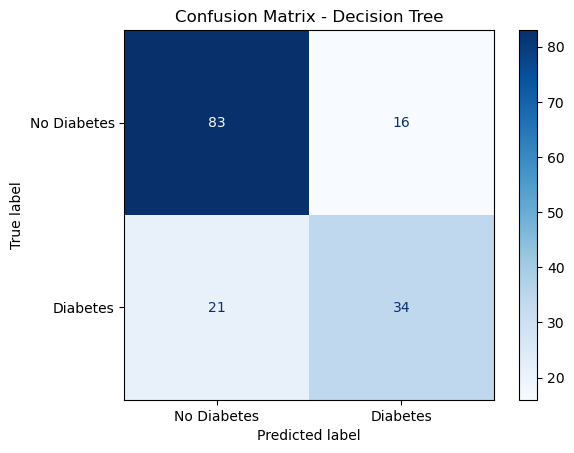

In [105]:
#  Decision Tree with specific hyperparameters
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Evaluation metrics are calculated based on the confusion matrix to assess the performance of the model. The code snippet below demonstrates the calculation of Precision, Recall, and F1-Score from the elements of the confusion matrix. Additionally, the accuracy is calculated.

In [106]:
# tn, fp, fn, tp
tn, fp, fn, tp = cm.ravel()

# Precision
precision = tp / (tp + fp)

#recall
recall = tp / (tp + fn)

# f1
f1 = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

#Printing the result
print(f"Decision Tree Classifier:\nAccuracy: {accuracy*100:.1f} %, Precision: {precision*100:.1f} %, Recall: {recall*100:.1f} %, F1 Score: {f1*100:.1f} %")

Decision Tree Classifier:
Accuracy: 76.0 %, Precision: 68.0 %, Recall: 61.8 %, F1 Score: 64.8 %


The following code snippet visualizes the trained Decision Tree model. The `plot_tree` function from `sklearn.tree` is used to generate a graphical representation of the tree structure, showing the decision rules learned by the model.

The visualization includes:

* **Feature Names:** The names of the features used for prediction ('Glucose', 'BloodPressure', 'BMI').
* **Class Names:** The target classes ('No Diabetes', 'Diabetes').
* **Filled Nodes:** The nodes are filled with color, indicating the majority class in that node.
* **Rounded Edges:** The edges of the nodes are rounded for better readability.
* **Font Size:** The text within the tree is set to a font size of 10.
* **Title:** A title "Decision Tree for Diabetes Prediction" is added to the plot.
* **Figure Size:** The size of the plot is set to 16 inches in width and 10 inches in height for better visualization.


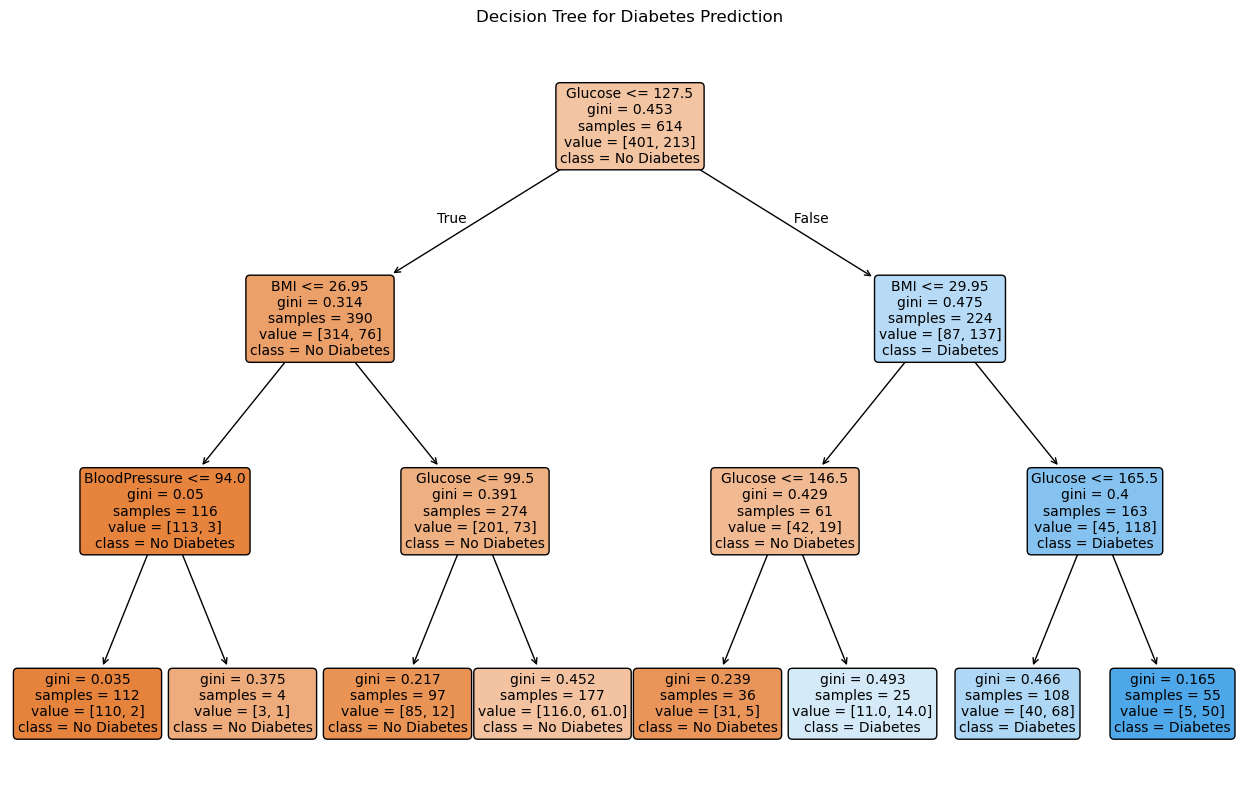

In [107]:
# Figure size
plt.figure(figsize=(16, 10))

# Visualize the decision tree
plot_tree(dt_model, 
          feature_names=['Glucose', 'BloodPressure', 'BMI'], 
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True, 
          rounded=True,
          fontsize=10)

plt.title("Decision Tree for Diabetes Prediction")
plt.show()

## 2- Support Vector Machine (SVM)

In this section, we will implement an **Support Vector Machine (SVM)** classifier on the [Titanic Dataset](https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset).

In [108]:
# Reading the new dataset
df = pd.read_csv("Titanic_Dataset.csv")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [109]:
# Only keep selected features
X = df[['Pclass','Age', 'Fare','SibSp']]
y = df['Survived']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#printing the result
X_train,y_train

(     Pclass   Age      Fare  SibSp
 707       1  22.0  151.5500      0
 239       3  60.0   14.4542      1
 381       3  32.0    7.9250      0
 791       3  60.0   69.5500      8
 682       3  14.0   46.9000      5
 ..      ...   ...       ...    ...
 106       3  60.0    7.7750      0
 270       3  25.0    0.0000      0
 860       1  48.0   25.9292      0
 435       3  21.0   34.3750      2
 102       3  33.0    8.6542      0
 
 [711 rows x 4 columns],
 707    1
 239    0
 381    0
 791    0
 682    0
       ..
 106    1
 270    1
 860    1
 435    0
 102    0
 Name: Survived, Length: 711, dtype: int64)

Here, we will develop different Support Vector Machine (SVM) classifiers, exploring the impact of various kernel functions on model performance.

### Linear kernel SVM

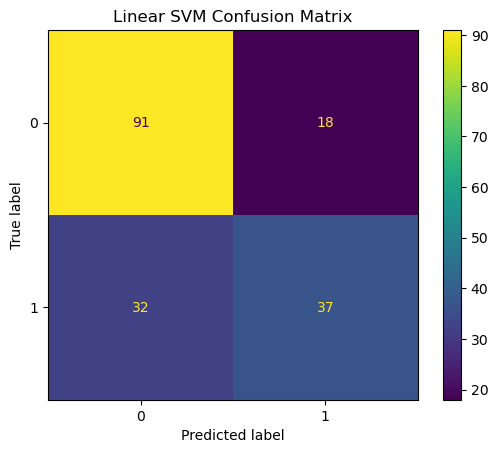

In [110]:
# svm with linear kernel
svm_linear = SVC(kernel='linear', C=1.0)

# Train the Linear SVM classifier
svm_linear.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_svm_linear = svm_linear.predict(X_test)

# Confusion matrix
# Compute the confusion matrix based on true and predicted labels on test data 
cm = confusion_matrix(y_test, y_pred_svm_linear)

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()
# Set the title for the confusion matrix plot
disp.ax_.set_title("Linear SVM Confusion Matrix")
plt.show()

In [111]:
# tn, fp, fn, tp
tn, fp, fn, tp = cm.ravel()

# Precision
precision = tp / (tp + fp)

#recall
recall = tp / (tp + fn)

# f1
f1 = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy_linear = (tp + tn) / (tp + tn + fp + fn)

#Printing the result
print(f"Decision Tree Classifier:\nAccuracy: {accuracy_linear*100:.1f} %, Precision: {precision*100:.1f} %, Recall: {recall*100:.1f} %, F1 Score: {f1*100:.1f} %")

Decision Tree Classifier:
Accuracy: 71.9 %, Precision: 67.3 %, Recall: 53.6 %, F1 Score: 59.7 %


### Polynomial kernel SVM

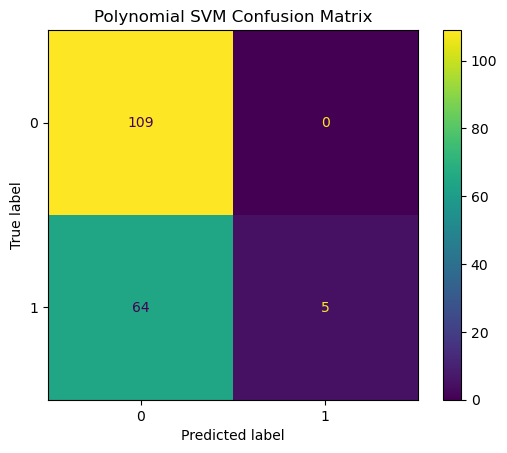

In [112]:
# SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)

# Train the model using training data
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Polynomial SVM Confusion Matrix")
plt.show()

In [113]:
# tn, fp, fn, tp
tn, fp, fn, tp = cm.ravel()

# Precision
precision = tp / (tp + fp)

#recall
recall = tp / (tp + fn)

# f1
f1 = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy_poly = (tp + tn) / (tp + tn + fp + fn)

#Printing the result
print(f"Decision Tree Classifier:\nAccuracy: {accuracy_poly*100:.1f} %, Precision: {precision*100:.1f} %, Recall: {recall*100:.1f} %, F1 Score: {f1*100:.1f} %")

Decision Tree Classifier:
Accuracy: 64.0 %, Precision: 100.0 %, Recall: 7.2 %, F1 Score: 13.5 %


### RBF kernel SVM

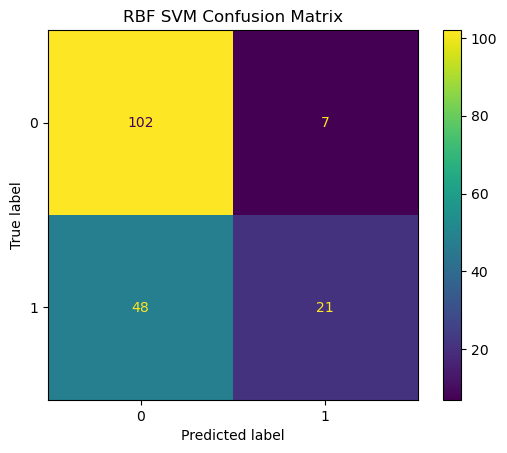

In [114]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X_train, y_train)
# Predict the labels for the test set
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("RBF SVM Confusion Matrix")
plt.show()

In [115]:
# tn, fp, fn, tp
tn, fp, fn, tp = cm.ravel()

# Precision
precision = tp / (tp + fp)

#recall
recall = tp / (tp + fn)

# f1
f1 = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy_rbf = (tp + tn) / (tp + tn + fp + fn)

#Printing the result
print(f"Decision Tree Classifier:\nAccuracy: {accuracy_rbf*100:.1f} %, Precision: {precision*100:.1f} %, Recall: {recall*100:.1f} %, F1 Score: {f1*100:.1f} %")

Decision Tree Classifier:
Accuracy: 69.1 %, Precision: 75.0 %, Recall: 30.4 %, F1 Score: 43.3 %


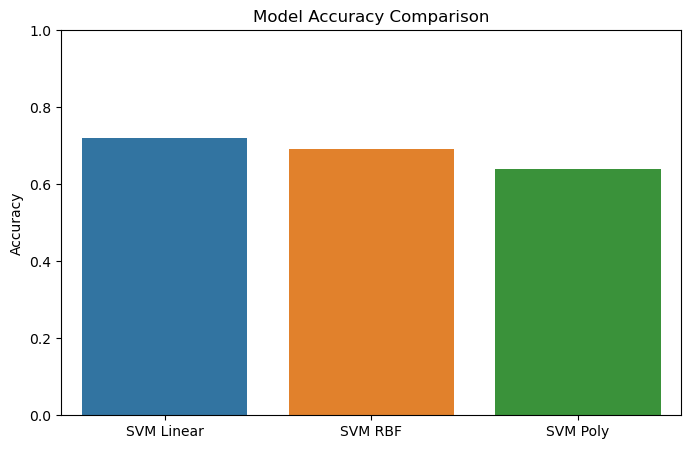

In [116]:
# Collect all model accuracies into a dictionary
accuracies = {
    "SVM Linear": accuracy_linear,
    "SVM RBF": accuracy_rbf,
    "SVM Poly": accuracy_poly,
   
}


plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

More complex models yielded worse results, indicating potential overfitting. Therefore, a simpler model like the linear kernel appears sufficient, not only performing adequately but also surpassing the more complex alternatives in this scenario.